In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
y = [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]

In [73]:
def returnData(x,k):
    temp = []
    for sup in range(k+1):
        temp.append(x**sup)
    return np.asarray(temp)

In [93]:
## Data Dimension
k = 3

## Input Data
train_x = []
for X in x:
    train_x.append(returnData(X,k))
train_x = np.asarray(train_x)
print np.shape(train_x)

(10, 4)


In [94]:
beta = 4
lambda1 = 1

mu_post = np.dot( np.linalg.inv(np.dot( np.transpose(train_x), train_x) + lambda1*np.identity(k+1)/beta),
                  np.dot(np.transpose(train_x), np.asarray(y)) )

sigma_post = np.linalg.inv(beta*np.dot(np.transpose(train_x), train_x) + lambda1*np.identity(k+1))


In [99]:
yPlt = []
xPlt = []
yPlt1 = []
yPlt2 = []
interval = 1
for i in np.arange(0.0,4.0+ interval,interval):
    xPlt.append(-1*(4-i))
    xData = returnData(-1*(4-i),k)
    mean = np.dot(np.transpose(mu_post), xData)
    var = np.dot(np.dot(np.transpose(xData), sigma_post ), xData )
    yPlt.append(mean)
    yPlt1.append(mean - 2*var)
    yPlt2.append(mean + 2*var)
    
for i in np.arange(0.0,4.0+ interval,interval):
    xPlt.append(i)
    xData = returnData(i,k)
    mean = np.dot(np.transpose(mu_post), xData)
    var = np.dot(np.dot(np.transpose(xData), sigma_post ), xData )
    yPlt.append(mean)
    yPlt1.append(mean - 2*var)
    yPlt2.append(mean + 2*var)

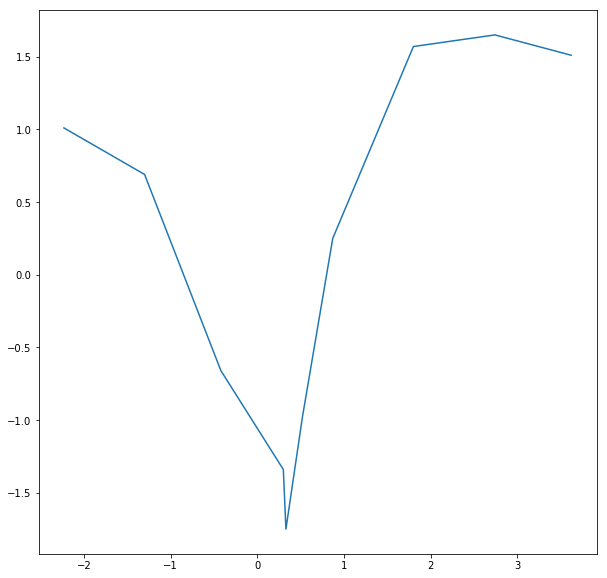

In [96]:
plt.plot(x,y)
plt.show()

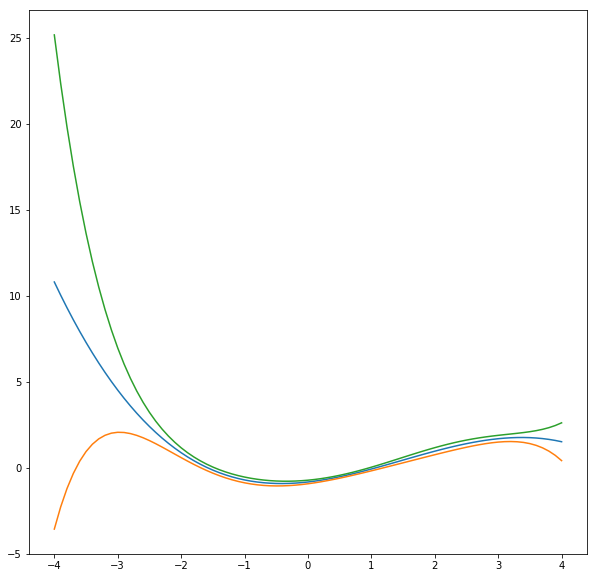

In [97]:
plt.plot(xPlt, yPlt)
plt.plot(xPlt, yPlt1)
plt.plot(xPlt, yPlt2)
plt.rcParams["figure.figsize"] = [10,10]
plt.show()